In [1]:
import numpy as np
import pandas as pd
import re
from SignParser import doPat

signals = pd.read_csv('signalisation.csv')
parkingSignals = signals[signals['DESCRIPTION_CAT'] == 'STATIONNEMENT']
print('parking signs shape: ', parkingSignals.shape)
print(parkingSignals.iloc[0])

parking signs shape:  (126360, 20)
X                                                             -73.5668
Y                                                               45.576
POTEAU_ID_POT                                                   240002
PANNEAU_ID_PAN                                                 1188478
PANNEAU_ID_RPA                                                    1762
DESCRIPTION_RPA        \P RESERVE DEBARCADERE HANDICAPES EN TOUT TEMPS
CODE_RPA                                                         RD-TT
FLECHE_PAN                                                           2
TOPONYME_PAN                                                       NaN
POTEAU_VERSION_POT                                                   1
DATE_CONCEPTION_POT                                         2.0161e+13
PAS_SUR_RUE                                                        NaN
DESCRIPTION_REP                                          En conception
DESCRIPTION_RTP                           

 Number of Unique Parking Signals (by code) 1850
 Number of Unique Parking Signals (by description) 1799


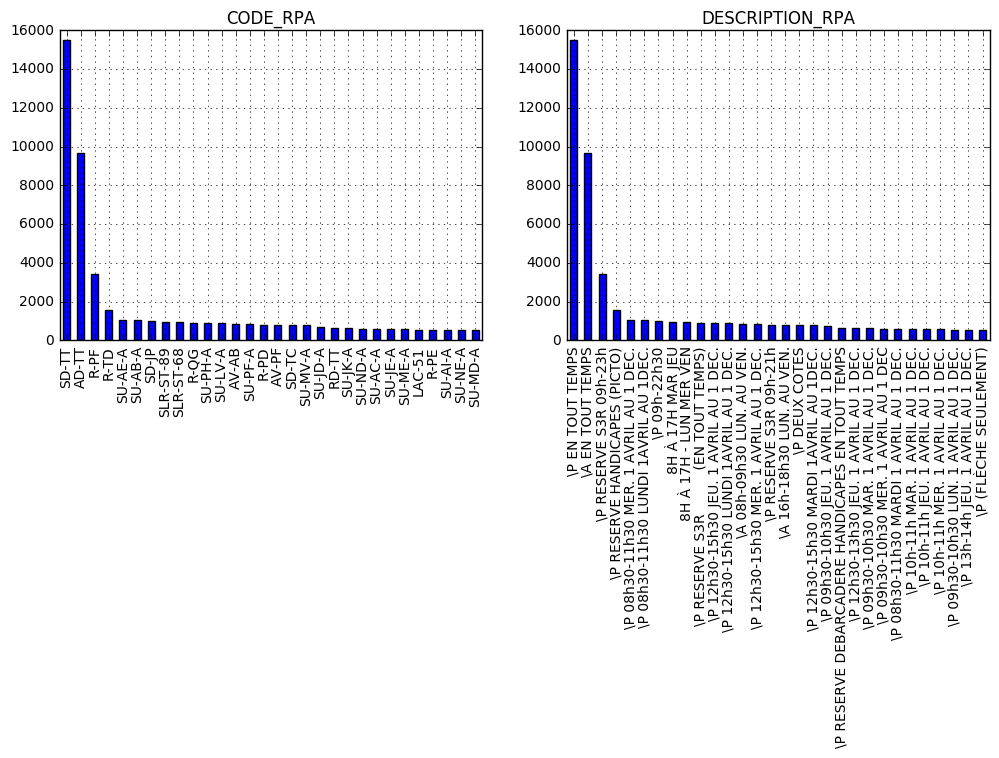

In [2]:
codes_rpa = list(set( parkingSignals['CODE_RPA'].values ))
descriptions = list(set( parkingSignals['DESCRIPTION_RPA'].values ))
print(' Number of Unique Parking Signals (by code)', len(codes_rpa))
print(' Number of Unique Parking Signals (by description)', len(descriptions))

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
parkingSignals['CODE_RPA'].value_counts()[0:30].plot(kind='bar', grid=True, title='CODE_RPA',ax=axes[0])
parkingSignals['DESCRIPTION_RPA'].value_counts()[0:30].plot(kind='bar', grid=True, title='DESCRIPTION_RPA',ax=axes[1])
plt.show()

In [3]:
def parseSignText(row):
    text_ = row['DESCRIPTION_RPA']
    
    #Parse the rule from the text of the sign
    rules, residue = doPat(text_)
    residue_rm = residue
    residue_rm = residue_rm.replace(" ", "")
    residue_rm = residue_rm.replace(".", "")
    if len(residue_rm) <= 2:
        return rules
    else:
        return []
    
parkingSignals['parsed'] = parkingSignals.apply(parseSignText, axis = 1)
print('done parsing!')
parkingSignals.to_pickle('parking_signs_text_parsed.pkl')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done parsing!


In [19]:
parkingSignals[parkingSignals['parsed'].str.len() > 0 ][['DESCRIPTION_RPA', 'parsed']].head()

,DESCRIPTION_RPA,parsed
6,\P 12h-13h JEU. 1 AVRIL AU 1 DEC.,"[[mainrule, noparking, ], [hour, [720, 780]], ..."
8,\P 10h-11h MAR. 1 AVRIL AU 1 DEC.,"[[mainrule, noparking, ], [hour, [600, 660]], ..."
10,\P 10h-11h MAR. 1 AVRIL AU 1 DEC.,"[[mainrule, noparking, ], [hour, [600, 660]], ..."
21,\P 12h-13h JEU. 1 AVRIL AU 1 DEC.,"[[mainrule, noparking, ], [hour, [720, 780]], ..."
25,\P 12h-13h JEU. 1 AVRIL AU 1 DEC.,"[[mainrule, noparking, ], [hour, [720, 780]], ..."


In [27]:
parkingSigns1 = pd.read_pickle('parking_signs_segments.pkl')
parkingSigns2 = pd.read_pickle('parking_signs_text_parsed.pkl')
parkingSigns1['parsed'] = parkingSigns2['parsed']

parkingSigns1.to_pickle('parking_signs_processed.pkl')
parkingSigns1.head()

,X,Y,POTEAU_ID_POT,PANNEAU_ID_PAN,PANNEAU_ID_RPA,DESCRIPTION_RPA,CODE_RPA,FLECHE_PAN,TOPONYME_PAN,POTEAU_VERSION_POT,...,Y_EPSG32188,Longitude,Latitude,DESCRIPTION_CAT,NOM_ARR,segmentX1,segmentY1,segmentX2,segmentY2,parsed
0,-73.566839,45.576004,240002,1188478,1762,\P RESERVE DEBARCADERE HANDICAPES EN TOUT TEMPS,RD-TT,2,NaN,1,...,5048457.227,-73.566839,45.576004,STATIONNEMENT,Rosemont - La Petite-Patrie,45.576765,-73.567400,45.575544,-73.563810,[]
1,-73.566864,45.576013,240001,1188479,1762,\P RESERVE DEBARCADERE HANDICAPES EN TOUT TEMPS,RD-TT,3,NaN,1,...,5048458.280,-73.566864,45.576013,STATIONNEMENT,Rosemont - La Petite-Patrie,45.576765,-73.567400,45.575544,-73.563810,[]
2,-73.567604,45.544142,240000,1188475,1686,\P RESERVE HANDICAPES (PICTO),R-TD,2,NaN,1,...,5044916.405,-73.567604,45.544142,STATIONNEMENT,Rosemont - La Petite-Patrie,45.544428,-73.567391,45.543585,-73.567880,[]
3,-73.567638,45.544091,239999,1188474,1686,\P RESERVE HANDICAPES (PICTO),R-TD,3,NaN,1,...,5044910.700,-73.567638,45.544091,STATIONNEMENT,Rosemont - La Petite-Patrie,45.544428,-73.567391,45.543585,-73.567880,[]
5,-73.685331,45.548059,239990,1188430,11,\A EN TOUT TEMPS,AD-TT,2,NaN,1,...,5045366.159,-73.685331,45.548059,STATIONNEMENT,Ahuntsic - Cartierville,45.548120,-73.685376,45.548170,-73.685027,[]
